## Problem Statement

Welcome to Sigma Cab Private Limited - a cab aggregator service. Their customers can download their app on smartphones and book a cab from any where in the cities they operate in. They, in turn search for cabs from various service providers and provide the best option to their client across available options. They have been in operation for little less than a year now. During this period, they have captured surge_pricing_type from the service providers.

You have been hired by Sigma Cabs as a Data Scientist and have been asked to build a predictive model, which could help them in predicting the surge_pricing_type pro-actively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.



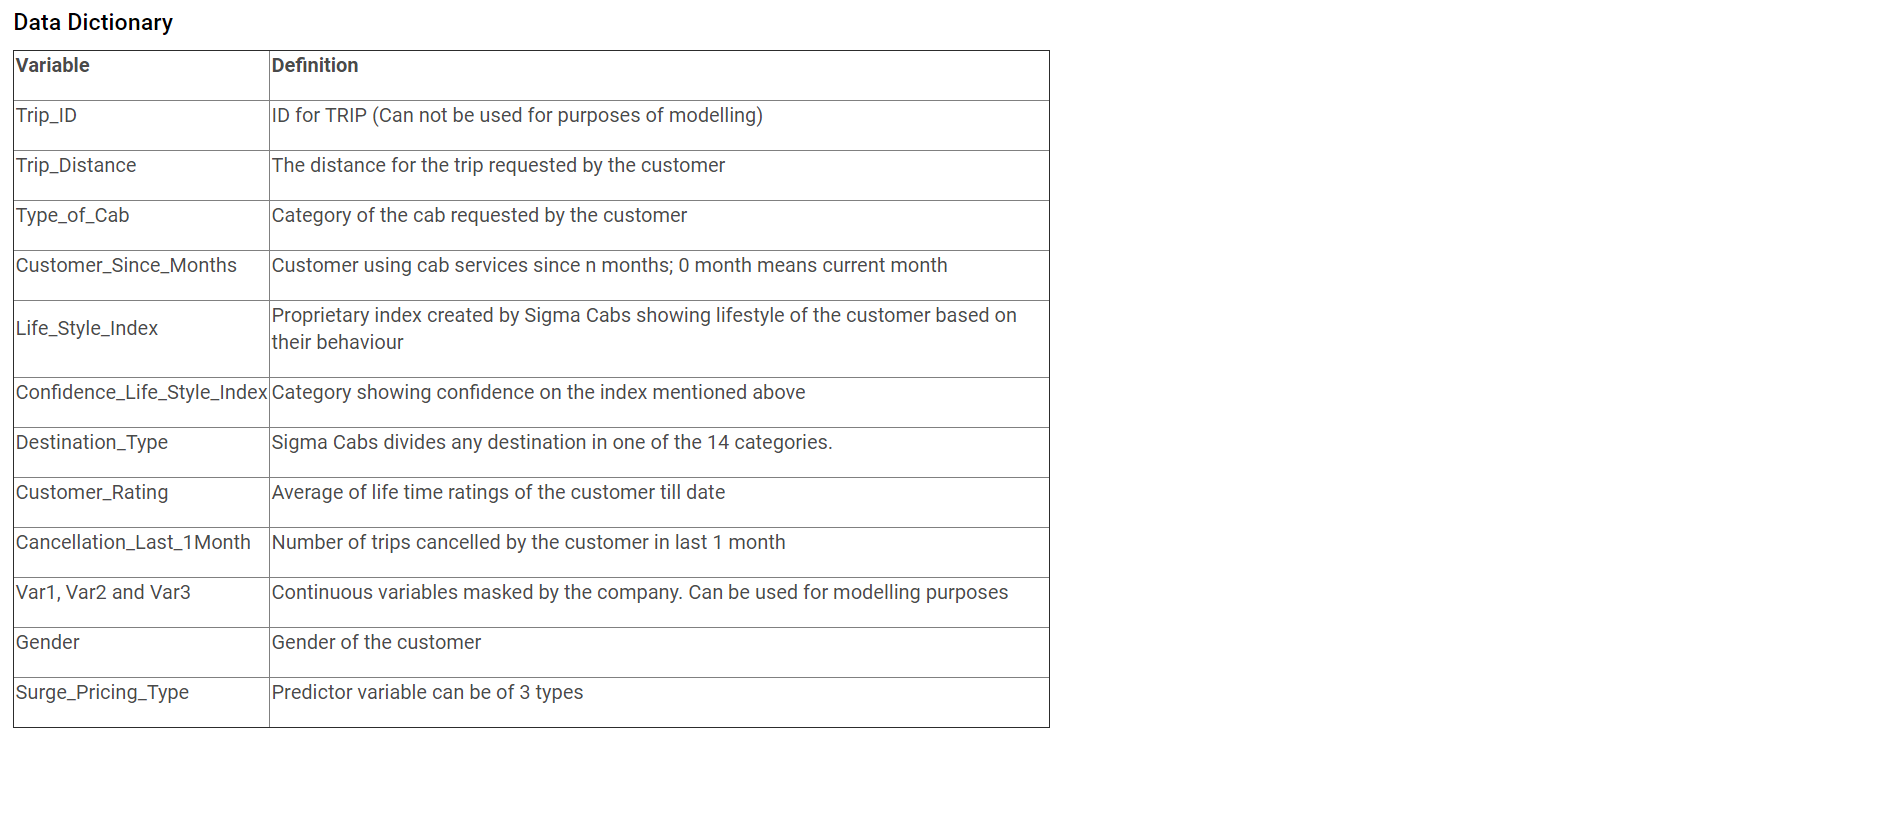

In [6]:
## Image

In [2]:
## import necessary libraries.

import numpy as np ## Numpy Library ( will use to convert data frame to array or creating array etc...).
import pandas as pd ## Pandas Library (will use to load data,create data frame...etc).
import os ## For connecting to machine to get path for reading/writing files.
from sklearn.model_selection import train_test_split ## For splitting data into train and validation.
from sklearn.preprocessing import LabelEncoder ## For label encoding(converting categorical values to label).
from xgboost import XGBClassifier ## XG boost model.
from sklearn.model_selection import GridSearchCV ## For Grid search(cross validation).
from sklearn.metrics import accuracy_score ## For getting accuracy value.
from sklearn.metrics import confusion_matrix ## For getting confusion matrix.
from sklearn.metrics import classification_report ## For classifier metrics(accuracy,TPR,TNR).
from sklearn.naive_bayes import GaussianNB ## Naive Nayes Model.
from sklearn.neighbors import KNeighborsClassifier ## KNN Model.
from sklearn.ensemble import RandomForestClassifier ## Random Forest  Model.
from sklearn.ensemble import BaggingClassifier ## Bagging Model.
from sklearn.ensemble import AdaBoostClassifier ## AdaBoost Model.
from sklearn.ensemble import GradientBoostingClassifier ## GradientBoost Model.
from sklearn.svm import SVC ## SVC Model.
from sklearn.impute import SimpleImputer ## For imputing NA values.

In [9]:
## Get current working directory.
os.getcwd()

'D:\\Python\\Pratice'

In [3]:
## Set working directory.
os.chdir("D:\\DataScience\\Pratice\\Mobility Analytics")
os.getcwd()

'D:\\DataScience\\Pratice\\Mobility Analytics'

In [51]:
## Load data sets.
train = pd.read_csv("train.csv",header='infer',sep=',')
test = pd.read_csv("test.csv",header='infer',sep=',')

In [52]:
## Get first 5 records of train data.
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [54]:
## Get last 5 records of train data.
train.tail()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2
131661,T0005908514,31.96,A,7.0,2.93773,A,E,2.63875,1,102.0,57,85,Male,1


In [53]:
## Get first 5 records of test data.
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [55]:
## Get last 5 records of test data.
test.tail()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
87390,T0005908503,29.43,C,3.0,2.40720,C,A,0.99750,0,74.0,48,72,Female
87391,T0005908504,14.83,C,10.0,2.57009,A,D,4.74375,0,109.0,42,60,Female
87392,T0005908505,37.86,A,6.0,3.08227,C,A,1.63500,0,NaN,57,77,Male
87393,T0005908511,10.63,C,1.0,NaN,NaN,J,2.59875,1,107.0,51,77,Male
87394,T0005908515,37.96,B,10.0,3.00274,A,A,2.05500,0,NaN,48,73,Female


In [56]:
## Check dimesnions of train data.
train.shape

(131662, 14)

In [57]:
## Check dimesnions of test data.
test.shape

(87395, 13)

In [58]:
## Check summary statistics of train data.
train.describe(include='all')

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
count,131662,131662.000000,111452,125742.000000,111469.000000,111469,131662,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662,131662.000000
unique,131662,NaN,5,NaN,NaN,3,14,NaN,NaN,NaN,NaN,NaN,2,NaN
top,T0005691715,NaN,B,NaN,NaN,B,A,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,1,NaN,31136,NaN,NaN,40355,77597,NaN,NaN,NaN,NaN,NaN,93900,NaN
mean,NaN,44.200909,NaN,6.016661,2.802064,NaN,NaN,2.849458,0.782838,64.202698,51.202800,75.099019,NaN,2.155747
std,NaN,25.522882,NaN,3.626887,0.225796,NaN,NaN,0.980675,1.037559,21.820447,4.986142,11.578278,NaN,0.738164
min,NaN,0.310000,NaN,0.000000,1.596380,NaN,NaN,0.001250,0.000000,30.000000,40.000000,52.000000,NaN,1.000000
25%,NaN,24.580000,NaN,3.000000,2.654730,NaN,NaN,2.152500,0.000000,46.000000,48.000000,67.000000,NaN,2.000000
50%,NaN,38.200000,NaN,6.000000,2.798050,NaN,NaN,2.895000,0.000000,61.000000,50.000000,74.000000,NaN,2.000000
75%,NaN,60.730000,NaN,10.000000,2.946780,NaN,NaN,3.582500,1.000000,80.000000,54.000000,82.000000,NaN,3.000000


In [59]:
## Check summary statistics of test data.
test.describe(include='all')

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
count,87395,87395.000000,74237,83429.000000,74068.000000,74068,87395,87395.000000,87395.000000,40606.000000,87395.000000,87395.000000,87395
unique,87395,NaN,5,NaN,NaN,3,14,NaN,NaN,NaN,NaN,NaN,2
top,T0005879609,NaN,B,NaN,NaN,B,A,NaN,NaN,NaN,NaN,NaN,Male
freq,1,NaN,20449,NaN,NaN,26910,51413,NaN,NaN,NaN,NaN,NaN,62228
mean,NaN,44.095174,NaN,5.990051,2.803392,NaN,NaN,2.847389,0.783031,63.936610,51.162160,75.015699,NaN
std,NaN,25.483993,NaN,3.626861,0.227113,NaN,NaN,0.981744,1.034266,21.636247,4.956831,11.582761,NaN
min,NaN,1.550000,NaN,0.000000,1.317850,NaN,NaN,0.001250,0.000000,30.000000,41.000000,52.000000,NaN
25%,NaN,24.540000,NaN,3.000000,2.654518,NaN,NaN,2.152500,0.000000,45.000000,48.000000,67.000000,NaN
50%,NaN,38.060000,NaN,6.000000,2.798630,NaN,NaN,2.895000,0.000000,61.000000,50.000000,73.000000,NaN
75%,NaN,60.690000,NaN,10.000000,2.949053,NaN,NaN,3.580000,1.000000,79.000000,54.000000,82.000000,NaN


In [60]:
## Check train data column data types.
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [61]:
## Check test data column data types.
test.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
dtype: object

In [62]:
## Get train data column names.
train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [63]:
## Get test data column names.
test.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender'],
      dtype='object')

In [64]:
## Get train data index range.
train.index

RangeIndex(start=0, stop=131662, step=1)

In [65]:
## Get test data index range.
test.index

RangeIndex(start=0, stop=87395, step=1)

In [66]:
## Check null values of train data.
train.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [67]:
## Check null values of test data.
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [68]:
## Set index to train and test data.
train.set_index('Trip_ID',inplace=True)
test.set_index('Trip_ID',inplace=True)

In [69]:
## Check first 5 records of train data after setting index.
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [70]:
## Check first 5 records of test data after setting index.
test.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
Trip_ID,,,,,,,,,,,,
T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [71]:
## Get object data types columns from train and store in obj_col.
obj_col = train.select_dtypes('object').columns
obj_col

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [72]:
## Data type Comversion(Convert object data type to category type).
def dtypesConversion(df):
    for col in obj_col:
        df[col] = df[col].astype('category')

In [73]:
## Convert object data type to category type for train data.
dtypesConversion(train)

In [74]:
## Get train data column data types.
train.dtypes

Trip_Distance                   float64
Type_of_Cab                    category
Customer_Since_Months           float64
Life_Style_Index                float64
Confidence_Life_Style_Index    category
Destination_Type               category
Customer_Rating                 float64
Cancellation_Last_1Month          int64
Var1                            float64
Var2                              int64
Var3                              int64
Gender                         category
Surge_Pricing_Type                int64
dtype: object

In [75]:
## Convert object data type to category type for test data.
dtypesConversion(test)

In [76]:
## Get test data column data types.
test.dtypes

Trip_Distance                   float64
Type_of_Cab                    category
Customer_Since_Months           float64
Life_Style_Index                float64
Confidence_Life_Style_Index    category
Destination_Type               category
Customer_Rating                 float64
Cancellation_Last_1Month          int64
Var1                            float64
Var2                              int64
Var3                              int64
Gender                         category
dtype: object

In [77]:
## Split data into train and test(80:20 ratio).
X_train,X_test,y_train,y_test = train_test_split(train.drop('Surge_Pricing_Type',axis=1),train['Surge_Pricing_Type'],test_size=0.2,random_state=1234)

In [78]:
## Check first 5 records of train data.
X_train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
Trip_ID,,,,,,,,,,,,
T0005697627,43.98,A,7.0,2.66033,C,A,3.06875,0,62.0,46,66,Male
T0005864449,49.12,D,6.0,2.81720,A,A,1.61000,1,NaN,57,69,Male
T0005875215,23.88,A,10.0,2.73214,B,A,2.16625,0,NaN,56,86,Male
T0005716163,58.50,D,10.0,2.68862,B,A,1.80875,0,NaN,57,73,Male
T0005754066,1.64,C,2.0,2.53496,A,E,1.91750,1,41.0,48,62,Male


In [79]:
## Check first 5 records of train data target column.
y_train.head()

Trip_ID
T0005697627    1
T0005864449    3
T0005875215    1
T0005716163    3
T0005754066    2
Name: Surge_Pricing_Type, dtype: int64

In [80]:
## Check first 5 records of validation data.
X_test.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
Trip_ID,,,,,,,,,,,,
T0005728750,25.50,NaN,9.0,2.84979,A,A,3.23375,0,108.0,53,78,Female
T0005876160,37.98,E,10.0,2.67992,B,A,3.25625,0,NaN,49,61,Female
T0005856288,54.18,C,0.0,2.93117,C,A,1.64375,0,63.0,46,72,Female
T0005692044,19.09,NaN,7.0,2.65003,A,A,1.91000,0,NaN,49,62,Female
T0005721115,75.86,A,10.0,3.08967,B,B,3.69625,0,NaN,44,63,Male


In [81]:
## Check first 5 records of validation data target column.
y_test.head()

Trip_ID
T0005728750    2
T0005876160    3
T0005856288    2
T0005692044    1
T0005721115    1
Name: Surge_Pricing_Type, dtype: int64

In [82]:
## Display train,validation dimensions.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105329, 12)
(26333, 12)
(105329,)
(26333,)


In [84]:
## Get numeric columns from train and validation data.
numcols_train = X_train.select_dtypes(['int64','float64'])
numcols_test = X_test.select_dtypes(['int64','float64'])

In [90]:
## Get numeric columns from test data.
test_numcols = test.select_dtypes(['int64','float64'])

In [85]:
## Get category columns from train and validation data.
catcols_train = X_train.select_dtypes('category')
catcols_test = X_test.select_dtypes('category')

In [91]:
## Get category columns from test data.
test_catcols = test.select_dtypes('category')

In [86]:
## Check first record of numeric column of train data.
numcols_train.head(1)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
Trip_ID,,,,,,,,
T0005697627,43.98,7.0,2.66033,3.06875,0,62.0,46,66


In [87]:
## Check first record of category column of train data.
catcols_train.head(1)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
Trip_ID,,,,
T0005697627,A,C,A,Male


In [88]:
## Check first record of numeric column of validation data.
numcols_test.head(1)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
Trip_ID,,,,,,,,
T0005728750,25.5,9.0,2.84979,3.23375,0,108.0,53,78


In [89]:
## Check first record of category column of validation data.
catcols_test.head(1)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
Trip_ID,,,,
T0005728750,NaN,A,A,Female


In [92]:
## Check first record of numeric column of test data.
test_numcols.head(1)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
Trip_ID,,,,,,,,
T0005689459,9.44,10.0,2.57438,3.68,2,NaN,46,63


In [93]:
## Check first record of category column of test data.
test_catcols.head(1)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
Trip_ID,,,,
T0005689459,A,A,B,Male


In [97]:
## Display dimensions of numeric,category columns of train,validation data.
print(numcols_train.shape)
print(numcols_test.shape)
print(test_numcols.shape)
print(catcols_train.shape)
print(catcols_test.shape)
print(test_catcols.shape)

(105329, 8)
(26333, 8)
(87395, 8)
(105329, 4)
(26333, 4)
(87395, 4)


In [95]:
## Instantiate Imputer for imputing numeric,category columns NA values.
num_imputer = SimpleImputer(strategy = 'median')
cat_imputer = SimpleImputer(strategy = 'most_frequent')

In [99]:
## Fit numeric imputer.
num_imputer.fit(numcols_train)

## Impute NA values for numeric column of train data and prepare a data frame.
X_train_imp_num = num_imputer.transform(numcols_train)
X_train_imp_num = pd.DataFrame(X_train_imp_num,columns=numcols_train.columns,index=numcols_train.index)

In [100]:
## Impute NA values for numeric column of validation data and prepare a data frame.
X_test_imp_num = num_imputer.transform(numcols_test)
X_test_imp_num = pd.DataFrame(X_test_imp_num,columns=numcols_test.columns,index=numcols_test.index)

In [101]:
## Impute NA values for numeric column of test data and prepare a data frame.
test_imp_num = num_imputer.transform(test_numcols)
test_imp_num = pd.DataFrame(test_imp_num,columns=test_numcols.columns,index=test_numcols.index)

In [105]:
## Fit category imputer.
cat_imputer.fit(catcols_train)

## Impute NA values for category column of train data and prepare a data frame.
X_train_imp_cat = cat_imputer.transform(catcols_train)
X_train_imp_cat = pd.DataFrame(X_train_imp_cat,columns=catcols_train.columns,index=catcols_train.index)

In [106]:
## Impute NA values for category column of validation data and prepare a data frame.
X_test_imp_cat = cat_imputer.transform(catcols_test)
X_test_imp_cat = pd.DataFrame(X_test_imp_cat,columns=catcols_test.columns,index=catcols_test.index)

In [107]:
## Impute NA values for category column of test data and prepare a data frame.
test_imp_cat = cat_imputer.transform(test_catcols)
test_imp_cat = pd.DataFrame(test_imp_cat,columns=test_catcols.columns,index=test_catcols.index)

In [108]:
## Check NA values for numeric column of train data after imputing.
X_train_imp_num.isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
dtype: int64

In [109]:
## Check NA values for numeric column of validation data after imputing.
X_test_imp_num.isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
dtype: int64

In [110]:
## Check NA values for numeric column of test data after imputing.
test_imp_num.isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
dtype: int64

In [113]:
## Check NA values for category column of train data after imputing.
X_train_imp_num.isnull().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
dtype: int64

In [114]:
## Check NA values for category column of validation data after imputing.
X_test_imp_num.isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
dtype: int64

In [115]:
## Check NA values for category column of test data after imputing.
test_imp_num.isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
dtype: int64

In [120]:
## Check dimenions of numeric columns of train data.
X_train_imp_num.shape

(105329, 8)

In [127]:
## Check dimenions of category columns of train data.
X_train_imp_cat.shape

(105329, 4)

In [123]:
## Check dimenions of numeric columns of validation data.
X_test_imp_num.shape

(26333, 8)

In [128]:
## Check dimenions of category columns of validation data.
X_test_imp_cat.shape

(26333, 4)

In [126]:
## Check dimenions of numeric columns of test data.
test_imp_num.shape

(87395, 8)

In [129]:
## Check dimenions of category columns of test data.
test_imp_cat.shape

(87395, 4)

In [167]:
## Get dummies for category columns of train data.
X_train_dummy_cat = pd.get_dummies(columns = X_train_imp_cat.columns, data = X_train_imp_cat, drop_first= True)

In [164]:
## Get dummies for category columns of validation data.
X_test_dummy_cat = pd.get_dummies(columns = X_test_imp_cat.columns, data = X_test_imp_cat, drop_first= True)

In [165]:
## Get dummies for category columns of test data.
test_dummy_cat = pd.get_dummies(columns = test_imp_cat.columns, data = test_imp_cat, drop_first= True)

In [177]:
## Check dimesnions of numeric,category columns of train data.
print(X_train_imp_num.shape)
print(X_train_dummy_cat.shape)

(105329, 8)
(105329, 20)


In [178]:
## Check dimesnions of numeric,category columns of validation data.
print(X_test_imp_num.shape)
print(X_test_dummy_cat.shape)

(26333, 8)
(26333, 20)


In [179]:
## Check dimesnions of numeric,category columns of test data.
print(test_imp_num.shape)
print(test_dummy_cat.shape)

(87395, 8)
(87395, 20)


In [168]:
## Concat numeric and category columns of train data.
train_data = pd.concat([X_train_imp_num, X_train_dummy_cat], axis=1,sort=False)

In [169]:
## Concat numeric and category columns of validation data.
validation_data = pd.concat([X_test_imp_num, X_test_dummy_cat], axis=1,sort=False)

In [170]:
## Concat numeric and category columns of test data.
test_data = pd.concat([test_imp_num, test_dummy_cat], axis=1,sort=False)

In [ ]:
## Check NA values for train data after concating numeric,category columns.
train_data.isna().sum()

In [172]:
## Check first record of train data.
train_data.head(1)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005697627,43.98,7.0,2.66033,3.06875,0.0,62.0,46.0,66.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
## Check NA values for validation data after concating numeric,category columns.
validation_data.isna().sum()

Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var1                             0
Var2                             0
Var3                             0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_D                    0
Type_of_Cab_E                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Destination_Type_L               0
Destination_Type_M               0
Destination_Type_N               0
Gender_Male                      0
dtype: int64

In [174]:
## Check first record of validation data.
validation_data.head(1)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005728750,25.5,9.0,2.84979,3.23375,0.0,108.0,53.0,78.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
## Check NA values for test data after concating numeric,category columns.
test_data.isna().sum()

Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var1                             0
Var2                             0
Var3                             0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_D                    0
Type_of_Cab_E                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Destination_Type_L               0
Destination_Type_M               0
Destination_Type_N               0
Gender_Male                      0
dtype: int64

In [176]:
## Check first record of test data.
test_data.head(1)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689459,9.44,10.0,2.57438,3.68,2.0,61.0,46.0,63.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [180]:
## Display dimesnions of train,validation,test data.
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(105329, 28)
(26333, 28)
(87395, 28)


In [181]:
## Instantiate label encoder.
le_Surge_Pricing_Type = LabelEncoder()

In [183]:
## Do label encoding for target column of train data.
y_train = le_Surge_Pricing_Type.fit_transform(y_train)

In [184]:
## Do label encoding for target column of validation data.
y_test = le_Surge_Pricing_Type.transform(y_test)

In [185]:
## Copy data from test to temp.
temp = test_data.copy()

In [186]:
xgb = XGBClassifier() ## Instantiate XGBClassifier model.

optimization_dict = {'max_depth': [2,3,4,5,6,7], ## trying with different max_depth,n_estimators to find best model.
                      'n_estimators': [50,60,70,80,90,100,150,200]} 

## Build best model with Grid Search params.
model = GridSearchCV(xgb, ## XGB model.
                     optimization_dict, ## Dictory with different max_depth,n_estimators.
                     scoring='accuracy', ## On which parameter we are interested.
                     verbose=1, ## For messaging purpose.
                     n_jobs=-1) ## Number of jobs to run in parallel. ''-1' means use all processors.

%time model.fit(train_data, y_train) ## Fit a model.
print(model.best_score_) ## Display best score values.
print(model.best_params_) ## Display best parameters.

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 36.1min finished


Wall time: 38min 11s
0.6934936951399497
{'max_depth': 6, 'n_estimators': 200}


In [187]:
## Build a model with best params which we were found after grid search CV (above code).
model = XGBClassifier(max_depth=6,           ## Depth of the tree.
                      n_estimators=200,      ## number of trees.
                      learning_rate = 0.001, ## learning rate.
                      booster ='gbtree',     ## tree type.
                      random_state=1234)     ## seed value.
## Fit a model.
%time model.fit(train_data, y_train)

Wall time: 1min 48s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [188]:
## Get the predictions on train data.
train_pred = model.predict(train_data)

In [189]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,train_pred))

Train Accuracy : 0.6801640573821075


In [191]:
## Get the predictions on validation data.
validation_pred = model.predict(validation_data)

In [192]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,validation_pred))

Validation Accuracy : 0.6757680476968063


In [193]:
## Get the confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[11831  8131  1778]
 [ 1765 39052  4616]
 [ 3139 14259 20758]]


In [194]:
## Get the confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, validation_pred)
print(confusion_matrix_test)

[[3007 1968  499]
 [ 471 9637 1187]
 [ 795 3618 5151]]


In [195]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.5926760845606652


Train TPR:  0.9567582134894774


Train Accuracy:  0.8371806051432238


In [196]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.6044221105527638


Test TPR:  0.9534032449544915


Test Accuracy:  0.8382947689451701


In [197]:
## Get the predictions on test data.
y_pred = model.predict(temp)

In [198]:
## Display predictions values.
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [199]:
## Copy temp value to temp1.
temp1 = temp.copy()

In [200]:
## Check first 5 records of temp1.
temp1.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689459,9.44,10.0,2.57438,3.68000,2.0,61.0,46.0,63.0,0,0,...,0,0,0,0,0,0,0,0,0,1
T0005689462,32.15,10.0,2.85143,1.59375,0.0,65.0,49.0,80.0,1,0,...,0,0,0,0,0,0,0,0,0,0
T0005689463,10.38,4.0,2.70530,4.50500,0.0,61.0,47.0,74.0,0,1,...,0,0,0,0,0,0,0,0,0,1
T0005689466,14.94,6.0,2.48159,4.53000,0.0,63.0,43.0,54.0,1,0,...,0,0,0,0,0,0,0,0,0,1
T0005689468,32.03,7.0,2.81598,4.60125,3.0,96.0,44.0,56.0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [203]:
## Do inverse transform on test predictions to get it's original values.
temp1['Surge_Pricing_Type'] = le_Surge_Pricing_Type.inverse_transform(y_pred)

In [204]:
## Reset index.
temp1.reset_index(inplace=True)

In [206]:
## Copy Trip_ID, Surge_Pricing_Type columns data from temp1 to to_submit_1.
to_submit_1 = temp1[['Trip_ID', 'Surge_Pricing_Type']]

In [210]:
## Check dimesnions of to_submit_1 data.
to_submit_1.shape

(87395, 2)

In [211]:
## Check dimesnions of test data.
test_data.shape

(87395, 28)

In [208]:
## Get value counts for Surge_Pricing_Type column of to_submit_1 data.
to_submit_1.Surge_Pricing_Type.value_counts()

2    50399
3    23044
1    13952
Name: Surge_Pricing_Type, dtype: int64

In [209]:
## Store to_submit_1 into csv file with name XGBoost. 
to_submit_1.to_csv('XGBoost.csv',index = False)

In [ ]:
## Build differnt models.

In [653]:
## Instantiate KNN model.
## model = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 3,metric = "euclidean")

In [654]:
## Instantiate Navie Bayes Model.
## model = GaussianNB()

In [655]:
## Instantiate Random forest Model.
## model = RandomForestClassifier(n_estimators=200,max_depth=6,n_jobs=-1,class_weight = 'balanced') #class_weight = 'balanced'

In [676]:
## Instantiate Bagging clasifier Model.
## model  = BaggingClassifier(n_estimators=500)

In [692]:
## Instantiate Adaboost Model.
## model = AdaBoostClassifier(n_estimators=200,learning_rate=.001)

In [708]:
## Instantiate Gradient boosting classifier Model.
## model = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01)

In [659]:
## Instantiate SVC Model.
## model = SVC(C=10,kernel='rbf')

In [660]:
## Random forest gave best result comapre to different classifier models.
model = RandomForestClassifier(n_estimators=2000,         ## The number of trees in the forest.
                               max_depth=7,               ## The maximum depth of the tree.
                               n_jobs=-1,                 ## The number of jobs to run in parallel. -1 means using all processors.
                               class_weight = 'balanced', ## Weights associated with classes in the form.
                               criterion='entropy')       ##The function to measure the quality of a split.

In [359]:
## Fit a model.
%time model.fit(train_data, y_train)

Wall time: 1min 2s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [360]:
## Get prediction on train and validation data.
predict_train = model.predict(train_data)
predict_validation = model.predict(validation_data)

In [361]:
## Display accuracy value for train data.
print("Train Accuracy :",accuracy_score(y_train,predict_train))

Train Accuracy : 0.6820913518594119


In [362]:
## Display  accuracy value for validation data.
print("Validation Accuracy :",accuracy_score(y_test,predict_validation))

Validation Accuracy : 0.6785022595222724


In [363]:
## Get the confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, predict_train)
print(confusion_matrix_train)

[[12545  7548  1647]
 [ 2620 38240  4573]
 [ 2885 14212 21059]]


In [364]:
## Get the confusion matrix for validation data.
confusion_matrix_validation = confusion_matrix(y_test, predict_validation)
print(confusion_matrix_validation)

[[3160 1830  484]
 [ 683 9440 1172]
 [ 714 3583 5267]]


In [365]:
## Get the predictions on test data.
y_pred = model.predict(temp)

In [366]:
## Copy temp data into temp1.
temp1 = temp.copy()

In [367]:
## Do inverse transform on test predictions to get it's original values.
temp1['Surge_Pricing_Type'] = le_Surge_Pricing_Type.inverse_transform(y_pred)

In [368]:
## Reset index.
temp1.reset_index(inplace=True)

In [369]:
## Copy Trip_ID,Surge_Pricing_Type columns data from temp1 to to-submit_1.
to_submit_1 = temp1[['Trip_ID', 'Surge_Pricing_Type']]

In [370]:
## Check dimensions of to_submit_1 data.
to_submit_1.shape

(87395, 2)

In [371]:
## Check dimesnions of test data.
test_data.shape

(87395, 28)

In [372]:
## Get value counts for Surge_Pricing_Type column of to_submit_1.
to_submit_1.Surge_Pricing_Type.value_counts()

2    49211
3    23244
1    14940
Name: Surge_Pricing_Type, dtype: int64

In [373]:
## Store to_submit_1 into csv file with name randomForest. 
to_submit_1.to_csv('randomForest.csv',index = False)